In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms.flow import shortest_augmenting_path

In [2]:
ptice= pd.read_table('aves_sparrow_social_2010.edges', sep=' ')

In [3]:
ptice

,node1,node2,weight
0,1,32,0.100000
1,1,33,0.066667
2,1,15,0.021739
3,1,4,0.026316
4,1,34,0.043478
...,...,...,...
300,47,25,0.013889
301,47,36,0.127660
302,51,50,0.333333
303,51,36,0.128205


In [4]:
edges=list()
edg=list()
for x in range(305):
    edg=(ptice.node1[x],ptice.node2[x])
    edges.append(edg)

In [5]:
G=nx.Graph()
G.add_edges_from(edges)

In [6]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 40\nNumber of edges: 305\nAverage degree:  15.2500'

In [7]:
triangles=nx.triangles(G)
triangles1=[]
for k in triangles:
    triangles1.append(int("{}".format(triangles[k],k)))
average_trig=sum(triangles1)/len(triangles1)

In [8]:
degree=G.degree(G)
nodes=G.nodes()
degree1=[]
for x in nodes:
    degree1.append(degree[x])
average_degree=sum(degree1)/len(degree1)

In [9]:
clique=nx.node_clique_number(G)
clique1=[]
for k in clique:
    clique1.append(int("{}".format(clique[k],k)))

In [10]:
#ova funkcija nx.core_number(G) je jedina funkcija koju sam nasla da ima veze sa k-core a da izbacuje listu 
#s kojom mogu radit al rezultat nije tocan
core=nx.core_number(G)
core1=[]
for k in core:
    core1.append(int("{}".format(core[k],k)))
max(core1)

11

In [11]:
#ovo je druga funkcija koju sam uspijela pronac al nisam skuzila cemu ta funkcija sluzi
nx.k_core(G)

In [12]:
a=[f'Nodes= {G.order()}',f'Edges= {G.size()}',f'Density= {nx.density(G)}',
   f'Min degree= {nx.node_connectivity(G, flow_func=shortest_augmenting_path)}',f'Max degree= {max(degree1)}',
   f'Average degree= {average_degree}',f'Assotrativity= {nx.degree_assortativity_coefficient(G)}',
   f'Max number of triangles= {max(triangles1)}',f'Number of triangles= {sum(triangles1)}',
   f'Average number of triangles= {average_trig}',f'Fraction of closed triangles= {nx.transitivity(G)}',
   f'Average clustering= {nx.average_clustering(G)}',f'Max clique number= {max(clique1)}']
a

['Nodes= 40',
 'Edges= 305',
 'Density= 0.391025641025641',
 'Min degree= 3',
 'Max degree= 29',
 'Average degree= 15.25',
 'Assotrativity= -0.11591796364572132',
 'Max number of triangles= 193',
 'Number of triangles= 3135',
 'Average number of triangles= 78.375',
 'Fraction of closed triangles= 0.5982824427480916',
 'Average clustering= 0.7082513019334458',
 'Max clique number= 10']

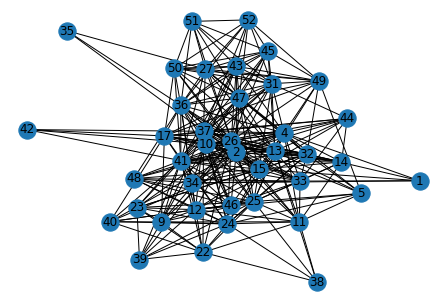

In [13]:
nx.draw(G, with_labels=True)
plt.show()

In [14]:
C=nx.Graph()

In [15]:
weighted_edges=list()
weig=list()
for x in range(305):
    weig=(ptice.node1[x],ptice.node2[x],ptice.weight[x])
    weighted_edges.append(weig)

In [16]:
C.add_weighted_edges_from(weighted_edges)

In [17]:
elarge=list()
esmall=list()
for x in range(305):
    if ptice.weight[x]>=0.1:
        elarge.append(weighted_edges[x])
    elif ptice.weight[x]<0.1:
        esmall.append(weighted_edges[x])

In [18]:
pos = nx.spring_layout(C, k=1)

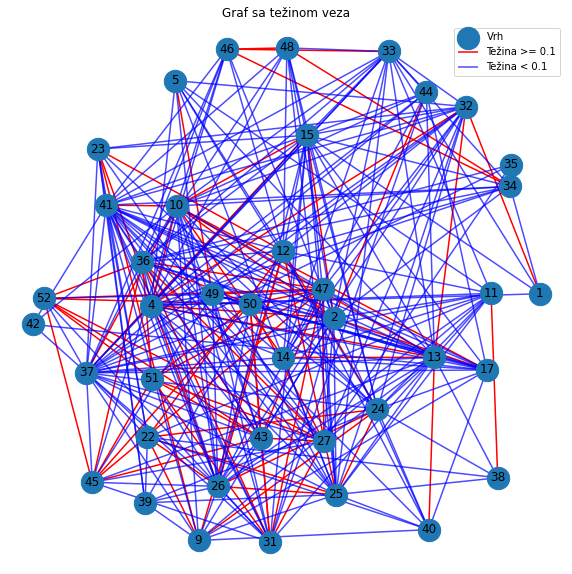

In [19]:
plt.figure(figsize=(10,10))

nx.draw_networkx_nodes(C,pos, node_size=500)

# edges
nx.draw_networkx_edges(C, pos, edgelist=elarge,
                       width=1.5, edge_color='r')
nx.draw_networkx_edges(C, pos, edgelist=esmall,
                       width=1.5, alpha=0.7, edge_color='b')

# labels
plt.title('Graf sa težinom veza')
plt.legend(['Vrh','Težina >= 0.1','Težina < 0.1'])
nx.draw_networkx_labels(C, pos, font_size=12)
plt.axis('off')
plt.show()